In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import neural_network
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('data/CollectionDatasets/us-airlines-monthly-aircraft-miles-flown.csv', encoding='utf-8')
df

,Month,MilesMM
0,1963-01,6827
1,1963-02,6178
2,1963-03,7084
3,1963-04,8162
4,1963-05,8462
...,...,...
91,1970-08,14057
92,1970-09,16234
93,1970-10,12389
94,1970-11,11595


In [11]:
df.isna().sum()

Month      0
MilesMM    0
dtype: int64

In [12]:
df['Year'] = df['Month'].apply(lambda x:int(x.split('-')[0]))
df['Month_of_year'] = df['Month'].apply(lambda x:int(x.split('-')[1]))

In [13]:
df

,Month,MilesMM,Year,Month_of_year
0,1963-01,6827,1963,1
1,1963-02,6178,1963,2
2,1963-03,7084,1963,3
3,1963-04,8162,1963,4
4,1963-05,8462,1963,5
...,...,...,...,...
91,1970-08,14057,1970,8
92,1970-09,16234,1970,9
93,1970-10,12389,1970,10
94,1970-11,11595,1970,11


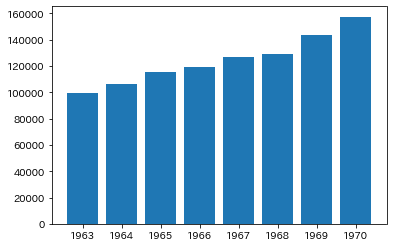

In [14]:
df_grp_year = df.groupby('Year')['MilesMM'].sum()

plt.figure()
plt.bar(df_grp_year.index, df_grp_year)
plt.show()

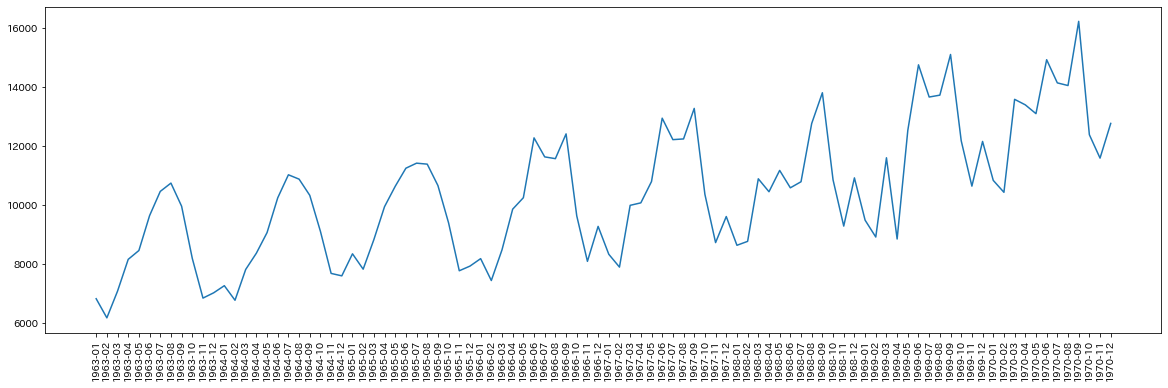

In [15]:
plt.figure(figsize=(20,6.0))
plt.plot(df['Month'], df['MilesMM'])
plt.xticks(rotation=90)
plt.show()

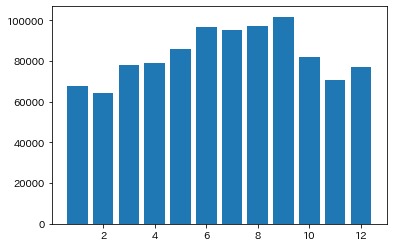

In [8]:
df_grp_month = df.groupby('Month')['MilesMM'].sum()

plt.figure()
plt.bar(df_grp_month.index, df_grp_month)
plt.show()

In [16]:
df['Month_sin'] = np.sin(2*np.pi * df['Month_of_year']/12)
df['Month_cos'] = np.cos(2*np.pi * df['Month_of_year']/12)

In [21]:
df.columns

Index(['Month', 'MilesMM', 'Year', 'Month_of_year', 'Month_sin', 'Month_cos'], dtype='object')

In [22]:
X = df[['Year', 'Month_sin', 'Month_cos']]
y = df['MilesMM']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(76, 3)
(20, 3)


In [23]:
models = [linear_model.LinearRegression(),
          neighbors.KNeighborsRegressor(),
          svm.SVR(),
          neural_network.MLPRegressor(),
          tree.DecisionTreeRegressor(max_depth=3),
          ensemble.RandomForestRegressor(max_depth=3),
          ensemble.GradientBoostingRegressor(n_estimators=100)]

In [24]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.845443,624.267356,7.023173e+05,838.043748,0.788932,828.401029,1.031298e+06,1015.528658
1,KNeighborsRegressor,0.821941,645.257895,8.091149e+05,899.508118,0.751126,974.850000,1.216024e+06,1102.734983
2,SVR,-0.001390,1728.736727,4.550386e+06,2133.163330,-0.196577,2009.949960,5.846604e+06,2417.975224
3,MLPRegressor,-4.794304,4670.244990,2.632972e+07,5131.249640,-2.668027,3613.824364,1.792237e+07,4233.482262
4,DecisionTreeRegressor,0.760050,840.110336,1.090351e+06,1044.198927,0.736071,1005.760870,1.289585e+06,1135.599098
5,RandomForestRegressor,0.863840,630.132012,6.187209e+05,786.588117,0.748277,935.776250,1.229945e+06,1109.028704
6,GradientBoostingRegressor,0.989061,146.091776,4.970610e+04,222.948647,0.860508,672.886424,6.815715e+05,825.573465


In [26]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.columns
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [27]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.845443,624.267356,7.023173e+05,838.043748,0.788932,828.401029,1.031298e+06,1015.528658
1,KNeighborsRegressor,0.855031,565.928947,6.587496e+05,811.633914,0.792024,864.170000,1.016195e+06,1008.064910
2,SVR,0.004720,1722.647399,4.522624e+06,2126.646249,-0.188632,2002.981106,5.807783e+06,2409.934168
3,MLPRegressor,-24.709732,10596.599837,1.168268e+08,10808.646047,-18.618321,9538.027132,9.585721e+07,9790.669556
4,DecisionTreeRegressor,0.760050,840.110336,1.090351e+06,1044.198927,0.736071,1005.760870,1.289585e+06,1135.599098
5,RandomForestRegressor,0.864221,616.183244,6.169905e+05,785.487434,0.746287,937.686286,1.239670e+06,1113.404776
6,GradientBoostingRegressor,0.989061,146.091776,4.970610e+04,222.948647,0.860181,677.119878,6.831699e+05,826.540908


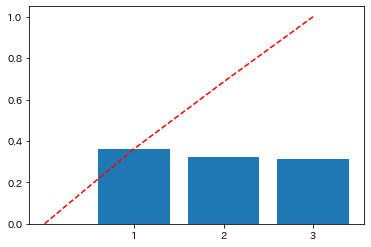

In [33]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [34]:
n = 3
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

In [35]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train_pca,y_train)
    y_pred = model.predict(X_train_pca)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test_pca)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.845443,624.267356,7.023173e+05,838.043748,0.788932,828.401029,1.031298e+06,1015.528658
1,KNeighborsRegressor,0.855925,558.310526,6.546860e+05,809.126692,0.803574,857.550000,9.597596e+05,979.673193
2,SVR,0.004720,1722.647399,4.522624e+06,2126.646249,-0.188632,2002.981106,5.807783e+06,2409.934168
3,MLPRegressor,-24.718664,10598.438381,1.168674e+08,10810.523379,-18.622995,9539.126923,9.588005e+07,9791.835651
4,DecisionTreeRegressor,0.849938,644.137645,6.818939e+05,825.768698,0.308068,1528.729578,3.380855e+06,1838.710236
5,RandomForestRegressor,0.887153,531.302671,5.127833e+05,716.088918,0.568518,1168.818187,2.108268e+06,1451.987518
6,GradientBoostingRegressor,0.994601,121.569976,2.453160e+04,156.625659,0.617562,1052.667701,1.868635e+06,1366.980192
